# Assigment week 1

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:

me_m = pd.read_csv(r"C:\Users\fiu126\Desktop\Coursera\Python\Introduction to Portfolio Construction and Analysis with Python\data\Portfolios_Formed_on_ME_monthly_EW.csv",
                       header=0, index_col=0, na_values=-99.99)
rets = me_m[['Lo 20', 'Hi 20']]
#rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')

In [3]:
rets.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [4]:
#Retorno Anual
n_meses=rets.shape[0]
retorno_mensal= (1+rets).prod()**(1/n_meses)-1
retorno_mensal
retorno_anual=(1+retorno_mensal)**12-1
retorno_anual*100

Lo 20    15.197701
Hi 20     9.849021
dtype: float64

In [ ]:
#Q1 - 15.20
#Q3 - 9.85

In [5]:
#Volatilidade Anual
Volatilidade_anual=rets.std()*np.sqrt(12)
Volatilidade_anual*100

Lo 20    33.670128
Hi 20    19.511604
dtype: float64

In [ ]:
#Q2 - 33.6
#Q4 - 19.51

In [6]:
# periodo entre 1999 e 2015
rets["1999":"2015"].shape

(204, 2)

In [7]:
rets_2=rets["1999":"2015"]

In [8]:
#Retorno Anual
n_meses=rets_2.shape[0]
retorno_mensal= (1+rets_2).prod()**(1/n_meses)-1
retorno_mensal
retorno_anual=(1+retorno_mensal)**12-1
retorno_anual*100

Lo 20    11.442634
Hi 20     6.286512
dtype: float64

In [ ]:
#Q5 - 11.44
#Q7 -6.29

In [9]:
#Volatilidade Anual
Volatilidade_anual=rets_2.std()*np.sqrt(12)
Volatilidade_anual*100

Lo 20    22.889447
Hi 20    17.271332
dtype: float64

In [ ]:
#Q6 - 22.89
#Q8 - 17.27

In [ ]:
# Drawdown
### 1) Compute the wealth_index
### 2) Compute previous peakes
### 3) Comput drawdown

In [10]:
Wealth_Index=1000*(1+rets["1999":"2015"]["Lo 20"]).cumprod()

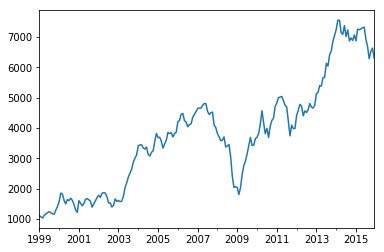

In [12]:
Wealth_Index.plot()

In [11]:
Previous_Peaks=Wealth_Index.cummax()

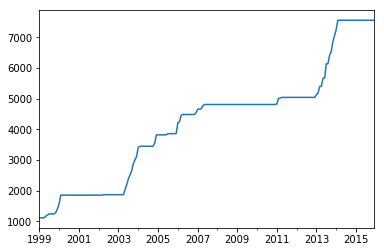

In [12]:
Previous_Peaks.plot()

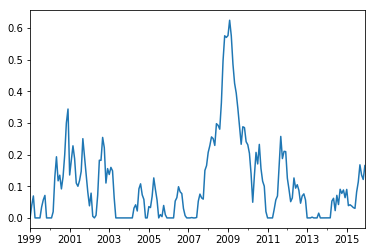

In [13]:
Drawdown=-(Wealth_Index-Previous_Peaks)/Previous_Peaks
Drawdown.plot()

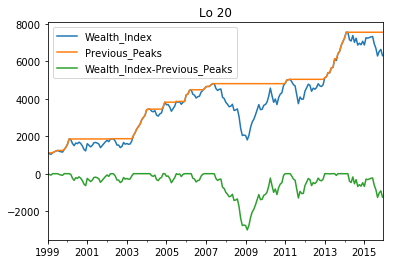

In [14]:
var_list=[Wealth_Index,Previous_Peaks,Wealth_Index-Previous_Peaks]
comparison=pd.concat(var_list,axis=1)
comparison.columns=['Wealth_Index','Previous_Peaks','Wealth_Index-Previous_Peaks']
comparison.plot(title="Lo 20")

In [15]:
Drawdown.max()*100

62.48092431236988

In [ ]:
#Q9 - 62.48

In [16]:
Drawdown.idxmax()

Period('2009-02', 'M')

In [ ]:
#Q10 - 2009-02

In [17]:
Wealth_Index=1000*(1+rets["1999":"2015"]["Hi 20"]).cumprod()

In [18]:
rets.head()

,Lo 20,Hi 20
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


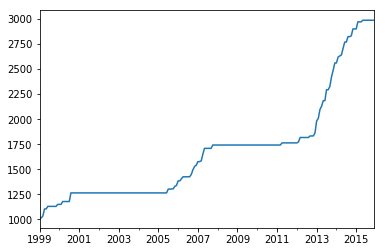

In [19]:
Previous_Peaks=Wealth_Index.cummax()
Previous_Peaks.plot()

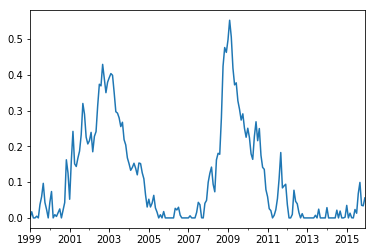

In [20]:
Drawdown=-(Wealth_Index-Previous_Peaks)/Previous_Peaks
Drawdown.plot()

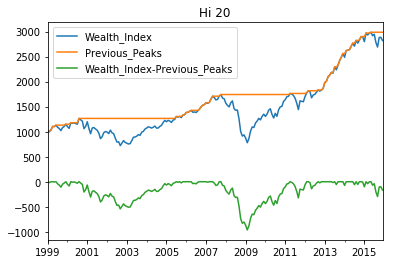

In [21]:
var_list=[Wealth_Index,Previous_Peaks,Wealth_Index-Previous_Peaks]
comparison=pd.concat(var_list,axis=1)
comparison.columns=['Wealth_Index','Previous_Peaks','Wealth_Index-Previous_Peaks']
comparison.plot(title="Hi 20")

In [22]:
Drawdown.max()*100

55.27349978713653

In [ ]:
#Q11 - 55.27

In [23]:
Drawdown.idxmax()

Period('2009-02', 'M')

In [ ]:
#Q12 - 2009-02

In [24]:
hfi=pd.read_csv(r"C:\Users\fiu126\Desktop\Coursera\Python\Introduction to Portfolio Construction and Analysis with Python\data\edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)
hfi = hfi/100
hfi.index =hfi.index.to_period('M')
hfi=hfi["2009":"2018"]
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2009-01,0.0491,-0.0016,0.0082,-0.0112,0.0079,0.0132,0.0112,0.0029,-0.0017,0.0056,0.0100,0.0282,0.0060
2009-02,0.0164,-0.0031,-0.0122,-0.0133,-0.0046,-0.0091,0.0065,-0.0055,-0.0161,0.0006,-0.0016,0.0328,-0.0037
2009-03,0.0235,-0.0180,0.0022,0.0350,0.0021,0.0117,0.0057,0.0048,0.0188,0.0125,0.0100,-0.0462,0.0008
2009-04,0.0500,-0.0140,0.0387,0.0663,-0.0012,0.0337,0.0221,0.0127,0.0375,0.0081,0.0342,-0.0820,0.0092
2009-05,0.0578,0.0213,0.0504,0.0884,0.0146,0.0442,0.0365,0.0348,0.0516,0.0107,0.0392,0.0008,0.0312


In [25]:
hfi.shape

(119, 13)

In [26]:
hfi[hfi<0].std(ddof=0).sort_values()

Fixed Income Arbitrage    0.003321
Merger Arbitrage          0.003611
Global Macro              0.005075
Equity Market Neutral     0.005186
Relative Value            0.005711
Convertible Arbitrage     0.006681
Funds Of Funds            0.007948
Distressed Securities     0.009498
Event Driven              0.010135
CTA Global                0.010996
Long/Short Equity         0.012139
Emerging Markets          0.015276
Short Selling             0.021240
dtype: float64

In [ ]:
#Q13 - Short Selling  

In [28]:
def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

In [29]:
skewness(hfi).sort_values()

Equity Market Neutral    -0.896327
Funds Of Funds           -0.646908
Merger Arbitrage         -0.551065
Event Driven             -0.488821
Long/Short Equity        -0.463703
Distressed Securities    -0.254944
Emerging Markets          0.033123
CTA Global                0.052062
Relative Value            0.159953
Global Macro              0.348184
Short Selling             0.456518
Fixed Income Arbitrage    1.121453
Convertible Arbitrage     1.305911
dtype: float64

In [ ]:
#Q14 - Equity Market Neutral

In [30]:
hfi=pd.read_csv(r"C:\Users\fiu126\Desktop\Coursera\Python\Introduction to Portfolio Construction and Analysis with Python\data\edhec-hedgefundindices.csv",header=0,index_col=0,parse_dates=True)
hfi = hfi/100
hfi.index =hfi.index.to_period('M')
hfi=hfi["2000":"2018"]
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
2000-01,0.0227,0.0128,0.0088,0.0077,0.0075,0.0088,0.0041,0.0021,0.0075,0.0143,0.0173,0.0427,0.0169
2000-02,0.0267,-0.0022,0.0421,0.0528,0.0253,0.0346,0.0097,0.0408,0.0699,0.0239,0.0185,-0.1340,0.0666
2000-03,0.0243,-0.0138,0.0103,0.0318,0.0134,0.0069,-0.0061,-0.0104,0.0006,0.0131,0.0163,-0.0230,0.0039
2000-04,0.0223,-0.0241,-0.0101,-0.0541,0.0168,-0.0059,-0.0006,-0.0304,-0.0201,0.0188,0.0092,0.1028,-0.0269
2000-05,0.0149,0.0114,-0.0132,-0.0433,0.0062,-0.0034,0.0107,-0.0070,-0.0097,0.0146,0.0080,0.0704,-0.0122


In [31]:
def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4


In [32]:
kurtosis(hfi).sort_values()

CTA Global                 2.845022
Global Macro               3.653278
Short Selling              4.352758
Long/Short Equity          4.472589
Merger Arbitrage           4.520785
Event Driven               5.543444
Emerging Markets           5.941289
Distressed Securities      6.231720
Funds Of Funds             7.584725
Relative Value            12.731096
Equity Market Neutral     20.329621
Convertible Arbitrage     23.001449
Fixed Income Arbitrage    33.378729
dtype: float64

In [ ]:
#Q16 - Fixed Income Arbitrage 